In [3]:
!pip install torch==2.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [4]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.1+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.4/943.4 kB 29.4 MB/s eta 0:00:00


In [5]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.8 MB/s eta 0:00:00


In [6]:
import torch

In [103]:
import os

In [7]:
from sklearn.cluster import SpectralClustering

In [8]:
import networkx as nx

In [9]:
graph = nx.read_edgelist('facebook_combined.txt')

In [10]:
from collections import Counter
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def plot_graph(g):
    pos = nx.spring_layout(g)
    nx.draw_networkx_nodes(g, pos, node_size=50)
    nx.draw_networkx_edges(g, pos)
    plt.show()

In [12]:
nx.draw_spring(graph)

KeyboardInterrupt: 

# Задача 1

In [13]:
clustering = SpectralClustering(affinity='precomputed', n_clusters=10)

In [14]:
adj = nx.adjacency_matrix(graph).toarray()

In [15]:
adj

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
clustering.fit(adj)

SpectralClustering(affinity='precomputed', n_clusters=10)

In [17]:
spectral_labels = clustering.labels_

In [18]:
set(spectral_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components=2)

In [21]:
tsne_emb = tsne.fit_transform(adj)

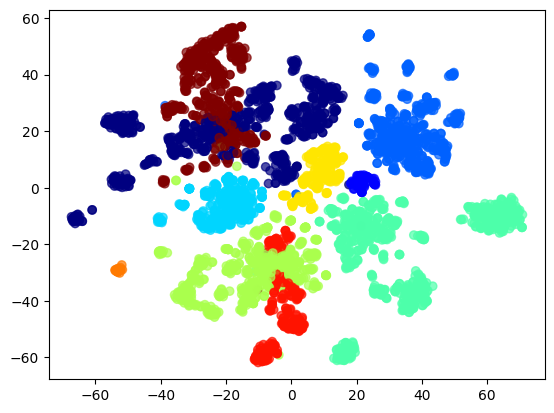

In [22]:
plt.scatter(tsne_emb[:, 0], tsne_emb[:, 1],
            c=spectral_labels, cmap='jet', alpha=0.7)

In [23]:
!7z x facebook.tar.gz
!7z x facebook.tar


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 732104 bytes (715 KiB)

Extracting archive: facebook.tar.gz
--
Path = facebook.tar.gz
Type = gzip
Headers Size = 10

  0% - facebook.tar                   Everything is Ok

Size:       4853760
Compressed: 732104

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 4853760 bytes (4740 KiB)

Extracting archive: facebook.tar
--
Path = facebook.tar
Type = tar
Physical Size = 4853760
Headers Size = 32768
Code Page = UTF-8

  0%    Everything is Ok

Folders: 

In [24]:
true_classes = list(spectral_labels)

In [25]:
len(true_classes)

4039

In [26]:
ego_nodes = [0, 107, 1684, 1912, 3437, 348, 3980, 414, 686, 698]

In [28]:
id = 0
for n in ego_nodes:
  ego_graph = nx.read_edgelist(f'facebook/{n}.edges')
  for node in ego_graph.nodes:
    true_classes[int(node)] = id
  id += 1

In [29]:
set(true_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [30]:
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score

In [31]:
adjusted_mutual_info_score(true_classes, spectral_labels)

0.5342680681987045

In [32]:
normalized_mutual_info_score(true_classes, spectral_labels)

0.5366565429830872

# Задача 2

In [33]:
!pip install node2vec

In [35]:
from node2vec import Node2Vec

In [36]:
n2v = Node2Vec(graph=graph, dimensions=64)

Computing transition probabilities:   0%|          | 0/4039 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:47<00:00,  4.76s/it]


In [38]:
n2v_model = n2v.fit()

In [40]:
embeddings = {node: n2v_model.wv[node] for node in graph.nodes()}

In [41]:
from sklearn.cluster import KMeans

In [42]:
vectors = list(embeddings.values())

In [43]:
kmeans = KMeans(n_clusters=10)

In [44]:
clusters = kmeans.fit_predict(vectors)

In [45]:
adjusted_mutual_info_score(true_classes, clusters)

0.5305166495741956

In [46]:
normalized_mutual_info_score(true_classes, clusters)

0.5328293103506831

In [50]:
from sklearn.manifold import TSNE

In [56]:
tsne = TSNE(n_components=2)

In [57]:
import numpy as np

In [58]:
tsne_emb = tsne.fit_transform(np.array(vectors))

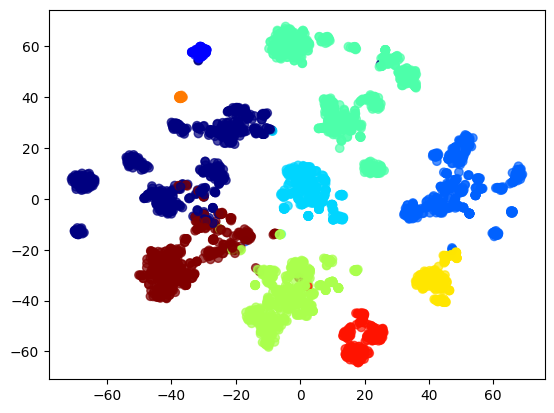

In [59]:
plt.scatter(tsne_emb[:, 0], tsne_emb[:, 1],
            c=spectral_labels, cmap='jet', alpha=0.7)

# Задача 3

Не знаев како да доделам labels на дата објектот, претпоставувам бидејќи ги направив случајни се добиваат екстремно лоши резултати со овој метод.

In [128]:
from torch_geometric.nn import SAGEConv
from torch.nn.functional import dropout
import torch
from torch_geometric.data import Data
import os


In [129]:

class GCN(torch.nn.Module):
    def __init__(self, dimensions=64):
        super().__init__()

        self.conv1 = SAGEConv((-1,-1), 64)
        self.conv2 = SAGEConv((-1,-1), 128)

        self.linear1 = torch.nn.Linear(128, dimensions)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).tanh()
        x = dropout(x, p=0.3)

        x = self.conv2(x, edge_index).tanh()
        x = dropout(x, p=0.3)

        x = self.linear1(x)
        return x


In [130]:

def train(model, dataset, optimizer, criterion, epochs=5):
    if len(dataset.train_mask.shape) > 1:
        train_mask = dataset.train_mask[:, 0]
    else:
        train_mask = dataset.train_mask

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(dataset.x, dataset.edge_index)
        loss = criterion(out[train_mask], dataset.y[train_mask])
        loss.backward()
        optimizer.step()

        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')


In [133]:
import random

num_classes = 10
labels = [random.randint(0, num_classes - 1) for _ in range(len(graph.nodes))]
node_features = torch.tensor([degree for node, degree in graph.degree()], dtype=torch.float).view(-1, 1)

node_mapping = {node: idx for idx, node in enumerate(graph.nodes)}
edge_index = torch.tensor([[node_mapping[u], node_mapping[v]] for u, v in graph.edges()], dtype=torch.long).t().contiguous()

data = Data(x=node_features, edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))


In [134]:
print(data.y.shape)

torch.Size([4039])


In [149]:
gcn = GCN(dimensions=64)
optimizer = torch.optim.Adam(gcn.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()


In [150]:
for epoch in range(100):
    gcn.train()
    optimizer.zero_grad()
    out = gcn(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    print(f'Epoch: {epoch}, Loss: {loss.item()}')


Epoch: 0, Loss: 4.288150310516357
Epoch: 1, Loss: 3.154520273208618
Epoch: 2, Loss: 2.600259780883789
Epoch: 3, Loss: 2.417546272277832
Epoch: 4, Loss: 2.3913519382476807
Epoch: 5, Loss: 2.38944935798645
Epoch: 6, Loss: 2.3682425022125244
Epoch: 7, Loss: 2.3586623668670654
Epoch: 8, Loss: 2.366607189178467
Epoch: 9, Loss: 2.3492696285247803
Epoch: 10, Loss: 2.3536570072174072
Epoch: 11, Loss: 2.3642420768737793
Epoch: 12, Loss: 2.360785722732544
Epoch: 13, Loss: 2.352001667022705
Epoch: 14, Loss: 2.3525443077087402
Epoch: 15, Loss: 2.3521246910095215
Epoch: 16, Loss: 2.3477697372436523
Epoch: 17, Loss: 2.3405725955963135
Epoch: 18, Loss: 2.340799570083618
Epoch: 19, Loss: 2.3420183658599854
Epoch: 20, Loss: 2.34184193611145
Epoch: 21, Loss: 2.331923484802246
Epoch: 22, Loss: 2.33115553855896
Epoch: 23, Loss: 2.3238089084625244
Epoch: 24, Loss: 2.330536127090454
Epoch: 25, Loss: 2.3269667625427246
Epoch: 26, Loss: 2.3174197673797607
Epoch: 27, Loss: 2.3148956298828125
Epoch: 28, Loss: 2

In [151]:
gcn_emb = gcn(data.x, data.edge_index).detach().cpu().numpy()

In [152]:
labels = data.y.detach().cpu().numpy()

In [153]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [154]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [155]:
model_tsne = TSNE(n_components=2)

In [156]:
gcn_emb_2d = model_tsne.fit_transform(gcn_emb)

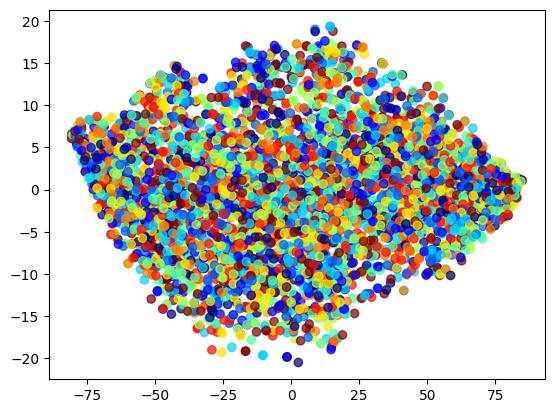

In [157]:
plt.scatter(gcn_emb_2d[:, 0], gcn_emb_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)

In [159]:
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 10


kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(gcn_emb)


cluster_labels = kmeans.labels_

In [160]:
node_labels = {node: cluster_labels[idx] for idx, node in enumerate(graph.nodes)}

In [162]:
ami = adjusted_mutual_info_score(labels, cluster_labels)
print(f"Adjusted Mutual Information (AMI): {ami:.4f}")


nmi = normalized_mutual_info_score(labels, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

Adjusted Mutual Information (AMI): -0.0000
Normalized Mutual Information (NMI): 0.0045
